# BoomBikes Demand Prediction Model using Linear Regression
### Problem Statement
#### BoomBikes aspires to understand the demand for shared bikes among the people. The company wants to know:
#### •	Which variables are significant in predicting the demand for shared bikes.
#### •	How well those variables describe the bike demands
##### Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features, which can be accordingly manipulated for the business strategy to meet the demand levels and meet the customer's expectations. 

## Step 1: Reading and describing Data

In [106]:
# Importing required libraries for the assignment
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
bikedf = pd.read_csv('day.csv')

In [108]:
# Viewing the first few records of provided data to check dataset
bikedf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [109]:
# Finding information of bike data
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [110]:
# Checking for missing values in the dataset
bikedf.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

####  Observation: 
##### There is no missing values in the provided dataset 

In [111]:
# Describing the dataset
bikedf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data Visualisation

In [112]:
bikedf['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [113]:
bikedf['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [114]:
len(bikedf['dteday'])

730

In [115]:
def convertdate(dtstr):
    dtday = dtstr[0:2]
    dtmon = dtstr[3:5]
    dtyr  = dtstr[6:10]
    dt = dtyr + dtmon + dtday
    return dt

In [116]:
bikedf['dtenum'] = bikedf['dteday'].apply(lambda x: convertdate(x)).astype(str).astype(int)

In [117]:
print(bikedf['dtenum'])

0      20180101
1      20180102
2      20180103
3      20180104
4      20180105
         ...   
725    20191227
726    20191228
727    20191229
728    20191230
729    20191231
Name: dtenum, Length: 730, dtype: int32


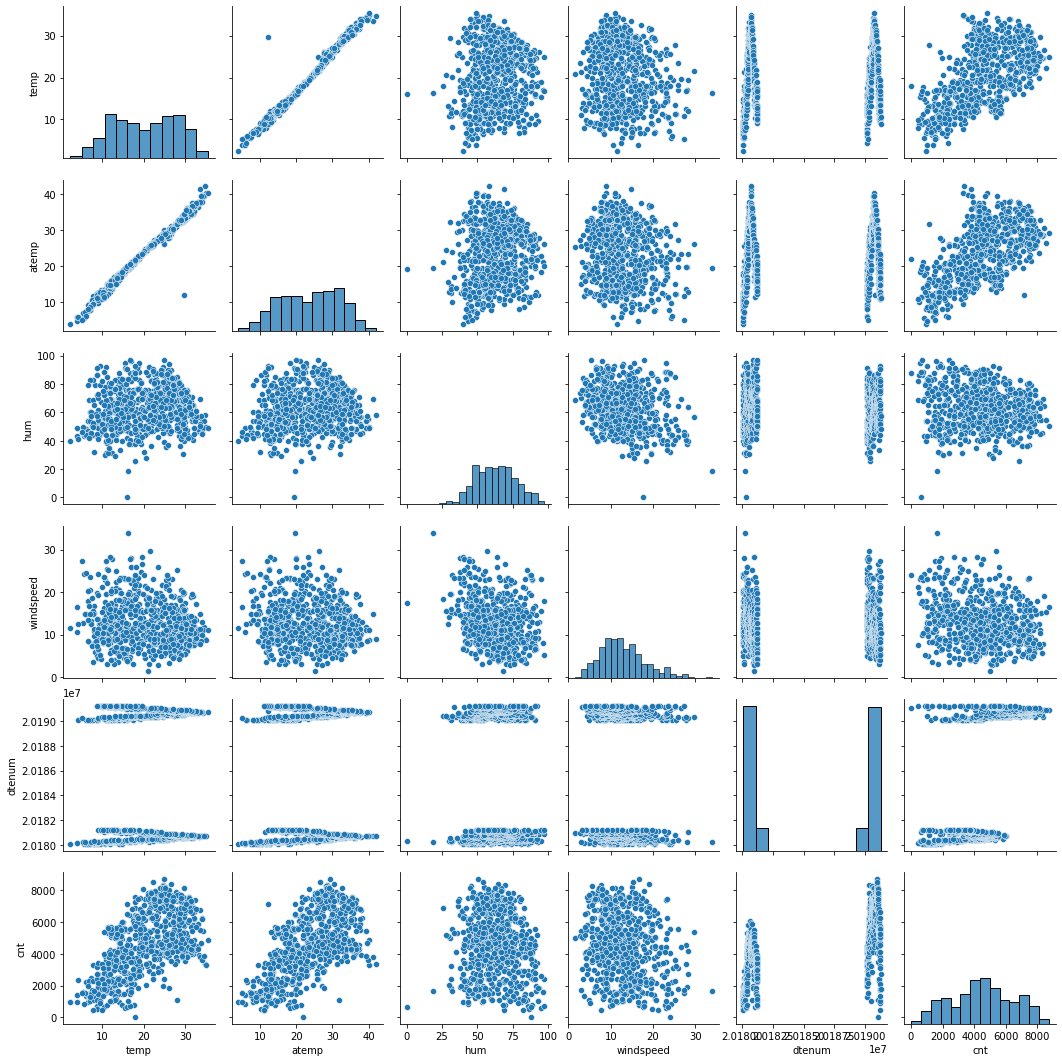

In [118]:
df1_sub = bikedf[["temp", "atemp" , "hum" , "windspeed", "dtenum", "cnt"]]
sns.pairplot(df1_sub)

### Observation:
#### 1. The independent variables temp and atemp shows strong linear relationship. Hence one of them can be considered for model
#### 2. "temp"/ "atemp" and "cnt" shows little linear tendency. Based on that one can inspect the prediction using Linear regression
#### 3. There is no other linear relationship observed in the provided data set

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

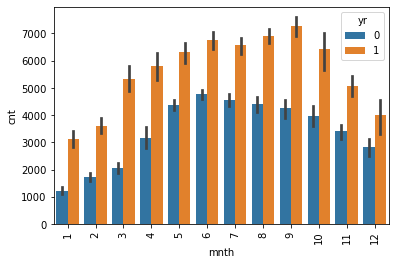

In [119]:
sns.barplot(bikedf['mnth'], bikedf['cnt'], hue=bikedf["yr"])
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

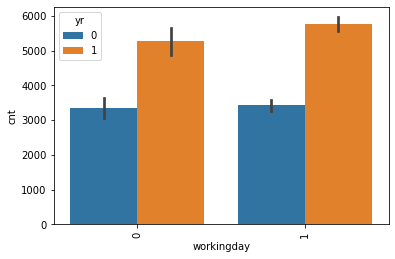

In [120]:
sns.barplot(bikedf['workingday'], bikedf['cnt'], hue=bikedf["yr"])
plt.xticks(rotation = 90)

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

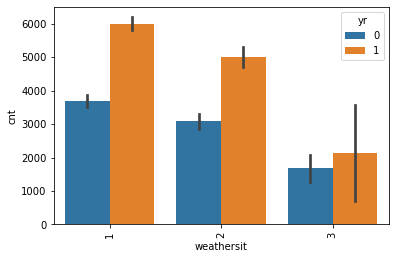

In [121]:
sns.barplot(bikedf['weathersit'], bikedf['cnt'], hue=bikedf["yr"])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

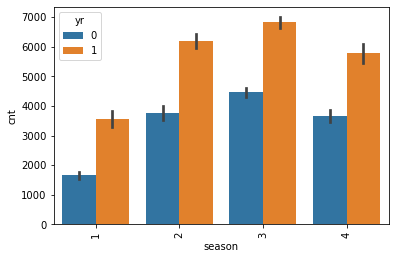

In [122]:
sns.barplot(bikedf['season'], bikedf['cnt'], hue=bikedf["yr"])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

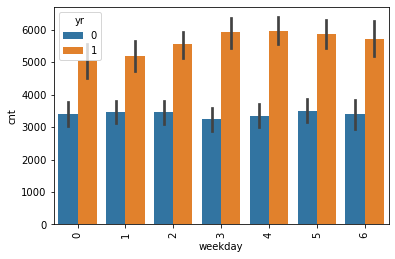

In [126]:
sns.barplot(bikedf['weekday'], bikedf['cnt'], hue=bikedf["yr"])
plt.xticks(rotation = 90)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

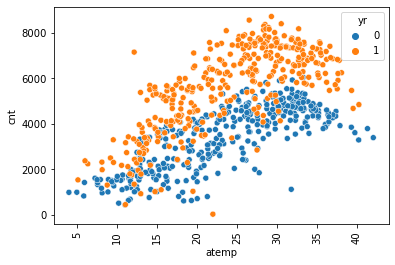

In [124]:
sns.scatterplot(bikedf['atemp'], bikedf['cnt'], hue=bikedf["yr"])
plt.xticks(rotation = 90)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

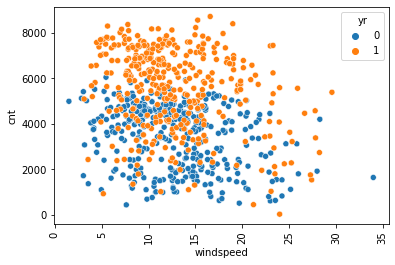

In [20]:
sns.scatterplot(bikedf['windspeed'], bikedf['cnt'], hue=bikedf["yr"])
plt.xticks(rotation = 90)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

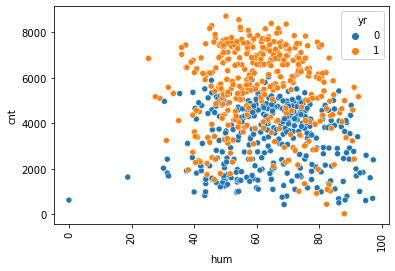

In [21]:
sns.scatterplot(bikedf['hum'], bikedf['cnt'], hue=bikedf["yr"])
plt.xticks(rotation = 90)

## Step 3: Data preparation for model building

In [22]:
dropcollist = ["temp", "instant", "dteday", "holiday", "casual", "registered", "dtenum"]
bikefltrddf=bikedf.drop(dropcollist, axis="columns")
print(bikefltrddf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 57.2 KB
None


In [23]:
catvarlist = ["season","yr","mnth","weekday","workingday","weathersit"]
for i in catvarlist:
    print(bikefltrddf[i].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
0    365
1    365
Name: yr, dtype: int64
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64


In [24]:
def object_map(x):
    return x.map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
varlist = ['season']
bikefltrddf['season'] = bikefltrddf[varlist].apply(object_map)
def month_map(x):
    return x.map({1: "jan", 2: "feb", 3: "mar", 4: "apr", 5: "may", 6: "jun", 7: "jul", 8: "aug", 9: "sep", 10: "oct", 11: "nov", 12: "dec"})
varlist = ['mnth']
bikefltrddf['mnth'] = bikefltrddf[varlist].apply(month_map)
def day_map(x):
    return x.map({0: "sun", 1: "mon", 2: "tue", 3: "wed", 4: "thu", 5: "fri", 6: "sat"})
varlist = ['weekday']
bikefltrddf['weekday'] = bikefltrddf[varlist].apply(day_map)
#def yr_map(x):
#    return x.map({0: "2018", 1: "2019"})
#varlist = ['yr']
#bikefltrddf['yr'] = bikefltrddf[varlist].apply(yr_map)
#def wkday_map(x):
#    return x.map({0: "holiday", 1: "working"})
#varlist = ['workingday']
#bikefltrddf['workingday'] = bikefltrddf[varlist].apply(wkday_map)
def wethr_map(x):
    return x.map({1: "clear", 2: "cloudy_misty", 3: "light_snow_and_snow", 4: "heavy_rain_and_snow"})
varlist = ['weathersit']
bikefltrddf['weathersit'] = bikefltrddf[varlist].apply(wethr_map)
bikefltrddf.head()

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,sat,0,cloudy_misty,18.18125,80.5833,10.749882,985
1,spring,0,jan,sun,0,cloudy_misty,17.68695,69.6087,16.652113,801
2,spring,0,jan,mon,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,tue,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,wed,1,clear,11.46350,43.6957,12.522300,1600


In [25]:
dseason = pd.get_dummies(bikefltrddf['season'], drop_first = True)
dseason.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
bikefltrddf = pd.concat([bikefltrddf, dseason], axis=1)
bikefltrddf.drop(['season'], axis = 1, inplace = True)
bikefltrddf.head()

,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,sat,0,cloudy_misty,18.18125,80.5833,10.749882,985,1,0,0
1,0,jan,sun,0,cloudy_misty,17.68695,69.6087,16.652113,801,1,0,0
2,0,jan,mon,1,clear,9.47025,43.7273,16.636703,1349,1,0,0
3,0,jan,tue,1,clear,10.60610,59.0435,10.739832,1562,1,0,0
4,0,jan,wed,1,clear,11.46350,43.6957,12.522300,1600,1,0,0


In [27]:
dmnth = pd.get_dummies(bikefltrddf['mnth'], drop_first = True)
dmnth.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [28]:
bikefltrddf = pd.concat([bikefltrddf, dmnth], axis=1)
bikefltrddf.drop(['mnth'], axis = 1, inplace = True)
bikefltrddf.head()

,yr,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,sat,0,cloudy_misty,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,sun,0,cloudy_misty,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,mon,1,clear,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,tue,1,clear,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,wed,1,clear,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [29]:
dweathersit = pd.get_dummies(bikefltrddf['weathersit'], drop_first = True)
dweathersit.head()

,cloudy_misty,light_snow_and_snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [30]:
bikefltrddf = pd.concat([bikefltrddf, dweathersit], axis=1)
bikefltrddf.drop(['weathersit'], axis = 1, inplace = True)
bikefltrddf.head()

,yr,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,jan,jul,jun,mar,may,nov,oct,sep,cloudy_misty,light_snow_and_snow
0,0,sat,0,18.18125,80.5833,10.749882,985,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,sun,0,17.68695,69.6087,16.652113,801,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,mon,1,9.47025,43.7273,16.636703,1349,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,tue,1,10.60610,59.0435,10.739832,1562,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,wed,1,11.46350,43.6957,12.522300,1600,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [31]:
dweekday = pd.get_dummies(bikefltrddf['weekday'], drop_first = True)
dweekday.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [32]:
bikefltrddf = pd.concat([bikefltrddf, dweekday], axis=1)
bikefltrddf.drop(['weekday'], axis = 1, inplace = True)
bikefltrddf.head()

,yr,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,...,oct,sep,cloudy_misty,light_snow_and_snow,mon,sat,sun,thu,tue,wed
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Step 4 : Splitting data set into train and test set

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
np.random.seed(0)
df_train, df_test = train_test_split(bikefltrddf, train_size = 0.7, test_size = 0.3, random_state = 100)

## Step 5 : Scaling training continuous data using MinMaxScaler normalizer

In [210]:
from sklearn.preprocessing import MinMaxScaler

In [211]:
scaler = MinMaxScaler()

In [212]:
numvars = ["atemp", "hum", "windspeed", "cnt"]

In [213]:
df_train[numvars] = scaler.fit_transform(df_train[numvars])
df_train.head()

,yr,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,...,oct,sep,cloudy_misty,light_snow_and_snow,mon,sat,sun,thu,tue,wed
653,1,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
576,1,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
728,1,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


## Step 6: Heatmap to find correlation between different variables

<AxesSubplot:>

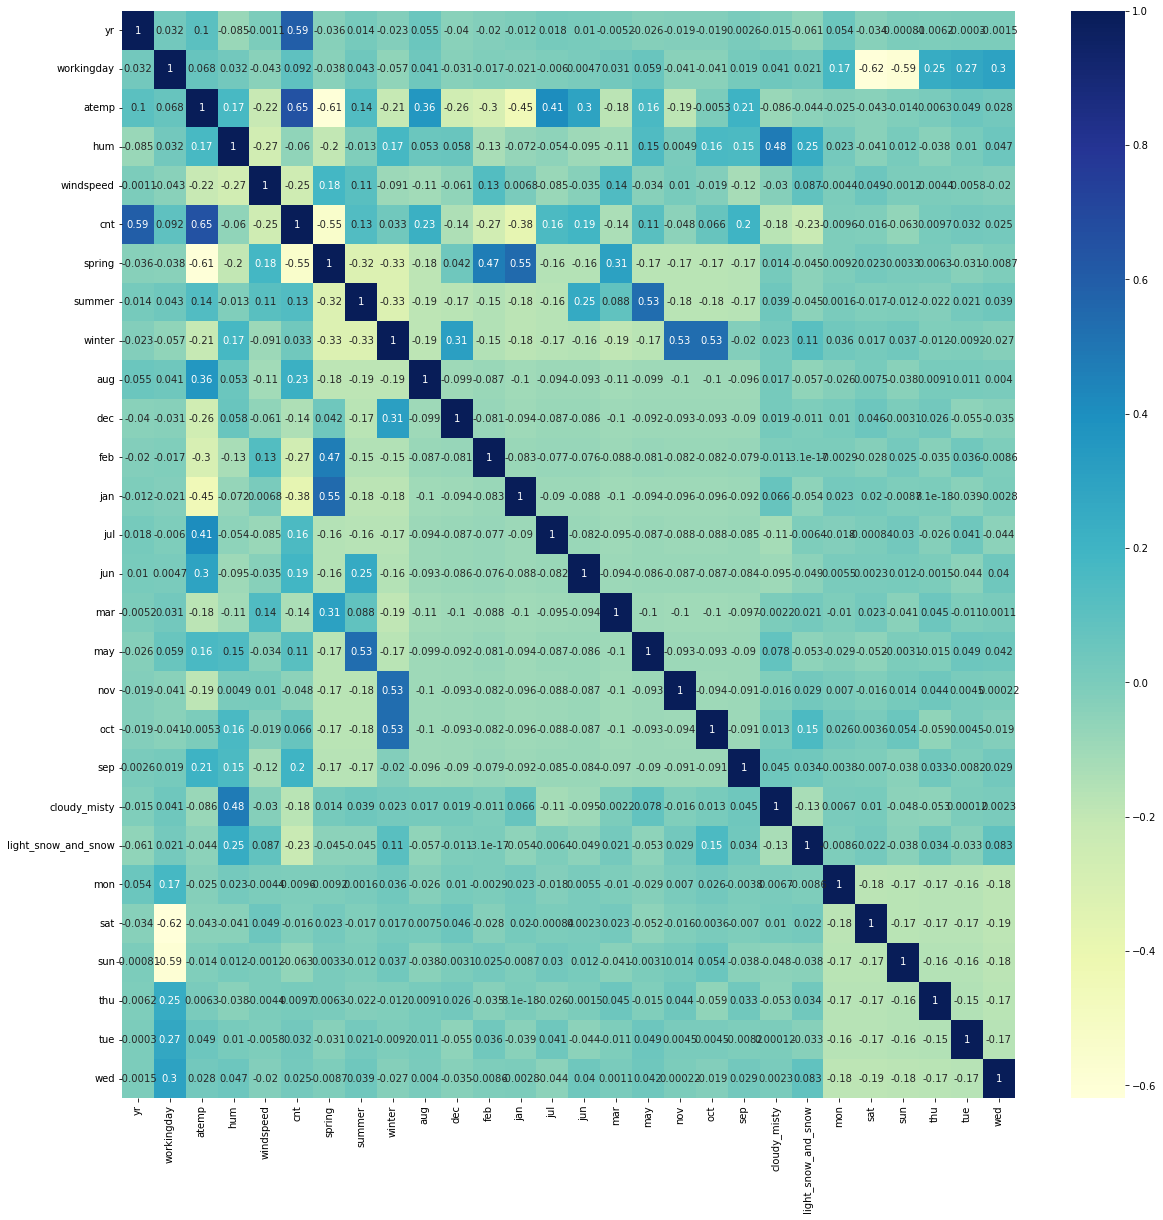

In [214]:
plt.figure(figsize = (20,20))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")

### Observation: 
##### Heatmap does not show any strong correlation between variables

## Step 7: Model building using iterative feature selection process

In [215]:
# Segregating between feature vector X and outcome/ target variable y as available in training data set
y_train = df_train.pop('cnt')
X_train = df_train

In [216]:
# Applying statsmodel by using feature vectors of training data set 
import statsmodels.api as sm

# Adding constant to fit linear model

X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                  0.282976
yr                     0.234176
workingday             0.079818
atemp                  0.419497
hum                   -0.145605
windspeed             -0.168583
spring                -0.055055
summer                 0.030819
winter                 0.099787
aug                    0.036894
dec                   -0.054028
feb                   -0.040490
jan                   -0.073420
jul                   -0.020120
jun                    0.017822
mar                   -0.000636
may                    0.035849
nov                   -0.047654
oct                    0.007796
sep                    0.091471
cloudy_misty          -0.062605
light_snow_and_snow   -0.254551
mon                   -0.026325
sat                    0.075627
sun                    0.020931
thu                   -0.013201
tue                   -0.022156
wed                   -0.008112
dtype: float64

In [217]:
# Printing statistics
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          4.12e-180
Time:                        23:18:14   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2830    

## Observation:
##### The regression result obtained with adjusted R-square value ~0.84% - indicating fairly explainable
##### However there are few variables observed with high p-value, thus indicating these are insignificant

In [218]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [219]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,39.22
2,atemp,34.24
1,workingday,22.41
5,spring,12.38
7,winter,12.16
6,summer,7.94
22,sat,6.63
17,oct,6.48
23,sun,6.20
16,nov,6.16


## Observation:
##### There are few independent variables having high VIF, showing strong correlation - as a next step considering highest VIF valued variable for  ##### dropping

In [220]:
# Dropping low significance/ insignificant variables (high p-values >= 0.06 :: "mar", "oct", "wed", "sun", "jul", "jun", "thu", "tue", 'may') 
# and highly correlated variables ("hum"). Humidity could be correlated with temperature, wind factor and weather condition
# hence could be showing high VIF (thus strong correlation)
droplst = ["mar", "oct", "wed", "sun", "jul", "jun", "thu", "tue",  "may", "hum", "mon", "feb"]
X = X_train.drop(droplst, 1,) 

In [221]:
# Build a fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [222]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     174.8
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          1.81e-186
Time:                        23:18:20   Log-Likelihood:                 508.19
No. Observations:                 510   AIC:                            -984.4
Df Residuals:                     494   BIC:                            -916.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1967    

## Observation:
##### After elimination of insiginficant variables the model adjusted R squared did not improve but there is no insignificant variable 

In [223]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.38
1,workingday,4.78
3,windspeed,4.63
4,spring,3.22
6,winter,3.17
5,summer,2.54
0,yr,2.07
14,sat,1.87
10,nov,1.78
7,aug,1.72


## Observation: 
#####    There is significant improvement in VIF values and most of the variables do not strong correlation 

## Step 8: Predicting training target using the model

In [224]:
y_train_cnt = lr_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

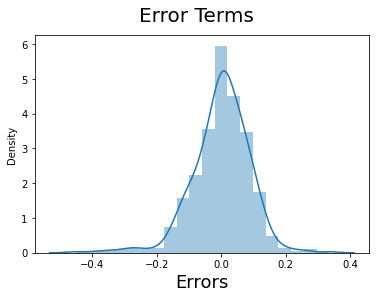

In [225]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Observation: 
##### Plot shows normalized behaviour - model can be used to predict test data

## Step 9: Scaling and predicting target using test data

In [226]:
df_test[numvars] = scaler.transform(df_test[numvars])

In [227]:
df_test.head()

,yr,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,...,oct,sep,cloudy_misty,light_snow_and_snow,mon,sat,sun,thu,tue,wed
184,0,0,0.769660,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
535,1,1,0.842587,0.610133,0.153728,0.712034,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
299,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
221,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
152,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [228]:
y_test = df_test.pop('cnt')
X_test = df_test

In [229]:
# Dropping highly correlated variables and insignificant variables
#droplst = ["mar", "oct", "wed", "sun", "jul", "jun", "thu", "tue", "hum", 'may']
X_test_m = X_test.drop(droplst, 1,) # mar, oct, wed, sun, jul, jun, thu

In [230]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test_m)

In [231]:
# Making predictions using the fourth model

y_pred_m4 = lr_2.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

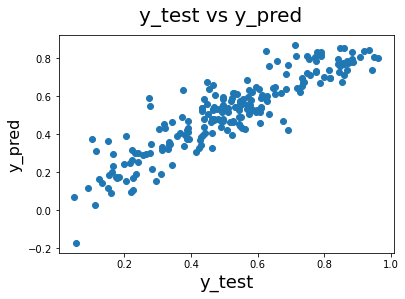

In [232]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

Text(0, 0.5, 'y_pred')

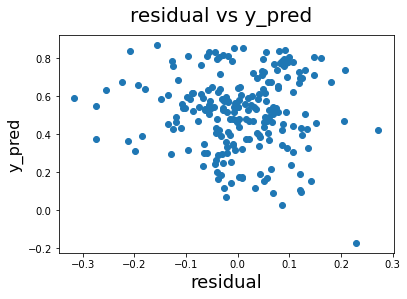

In [236]:
# Plotting residual vs y_pred to understand the spread

fig = plt.figure()
plt.scatter((y_test - y_pred_m4), y_pred_m4)
fig.suptitle('residual vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('residual', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

Text(0.5, 0, 'Errors')

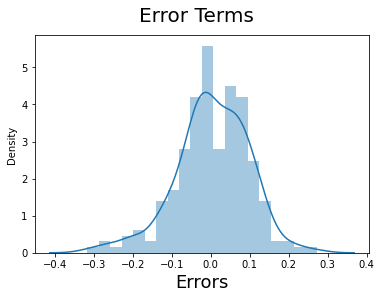

In [178]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_m4), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [179]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.8157494793741353

# Beginning of RFE based modelling

In [180]:
np.random.seed(0)
df_train_rfe, df_test_rfe = train_test_split(bikefltrddf, train_size = 0.7, test_size = 0.3, random_state = 100)

In [181]:
df_train_rfe[numvars] = scaler.fit_transform(df_train_rfe[numvars])
df_train_rfe.head()

,yr,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,...,oct,sep,cloudy_misty,light_snow_and_snow,mon,sat,sun,thu,tue,wed
653,1,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
576,1,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
728,1,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [182]:
y_train_rfe = df_train_rfe.pop('cnt')
X_train_rfe = df_train_rfe

In [183]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [184]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train_rfe, y_train_rfe)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train_rfe, y_train_rfe)

In [185]:
list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 3),
 ('feb', False, 5),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 9),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('cloudy_misty', True, 1),
 ('light_snow_and_snow', True, 1),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', False, 4),
 ('thu', False, 12),
 ('tue', False, 11),
 ('wed', False, 14)]

In [186]:
#droplst = ["mar", "oct", "wed", "sun",  "jun", "thu", "tue",  "may", "aug", "feb","summer", "mon"]
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'spring', 'winter',
       'jan', 'jul', 'sep', 'cloudy_misty', 'light_snow_and_snow', 'sat'],
      dtype='object')

In [187]:
X_train_rfe.columns[~rfe.support_]

Index(['summer', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [188]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_f = X_train_rfe[col]

In [189]:
X_rfe = sm.add_constant(X_train_rfe_f)
lm_rfe = sm.OLS(y_train,X_rfe).fit()   # Running the linear model

In [190]:
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          8.73e-189
Time:                        23:12:49   Log-Likelihood:                 508.21
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2976    

In [191]:
vif = pd.DataFrame()
X = X_train_rfe_f
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.43
2,atemp,16.66
1,workingday,4.65
4,windspeed,4.07
5,spring,2.89
10,cloudy_misty,2.23
0,yr,2.07
6,winter,2.05
12,sat,1.82
7,jan,1.67


In [192]:
X_train_rfe_f1 = X_train_rfe_f.drop(['hum'], axis=1)

In [193]:
X_rfe_1 = sm.add_constant(X_train_rfe_f1)
lm_rfe_1 = sm.OLS(y_train,X_rfe_1).fit()   # Running the linear model

In [194]:
print(lm_rfe_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.6
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          6.35e-187
Time:                        23:13:03   Log-Likelihood:                 501.00
No. Observations:                 510   AIC:                            -976.0
Df Residuals:                     497   BIC:                            -920.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2202    

In [195]:
vif = pd.DataFrame()
X = X_train_rfe_f1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.51
1,workingday,4.52
3,windspeed,4.05
4,spring,2.34
0,yr,2.06
11,sat,1.80
6,jan,1.62
9,cloudy_misty,1.55
5,winter,1.44
7,jul,1.36


In [196]:
y_train_predict_rfe = lm_rfe_1.predict(X_rfe_1)

Text(0.5, 0, 'Errors')

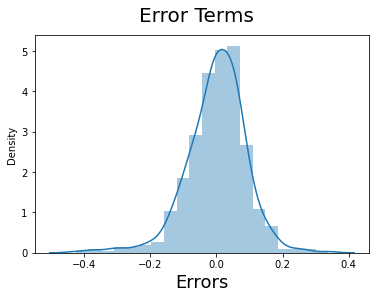

In [197]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_rfe - y_train_predict_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [198]:
df_test_rfe
df_test_rfe[numvars] = scaler.transform(df_test_rfe[numvars])
df_test_rfe.head()

,yr,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,...,oct,sep,cloudy_misty,light_snow_and_snow,mon,sat,sun,thu,tue,wed
184,0,0,0.769660,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
535,1,1,0.842587,0.610133,0.153728,0.712034,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
299,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
221,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
152,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [199]:
y_test_rfe = df_test_rfe.pop('cnt')
X_test_rfe = df_test_rfe

In [200]:
X_test_rfe_f = X_test_rfe[col]

In [201]:
X_test_rfe_f = X_test_rfe_f.drop(['hum'], axis=1)

In [202]:
# Now let's use our model to make predictions.

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_rfe_f)

In [203]:
# Making predictions
y_pred_rfe = lm_rfe_1.predict(X_test_new)

Text(0, 0.5, 'y_pred_rfe')

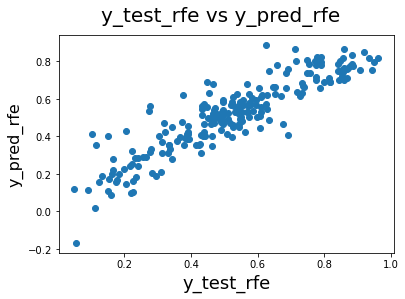

In [204]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_rfe,y_pred_rfe)
fig.suptitle('y_test_rfe vs y_pred_rfe', fontsize=20)              # Plot heading 
plt.xlabel('y_test_rfe', fontsize=18)                          # X-label
plt.ylabel('y_pred_rfe', fontsize=16)                          # Y-label

Text(0.5, 0, 'Errors')

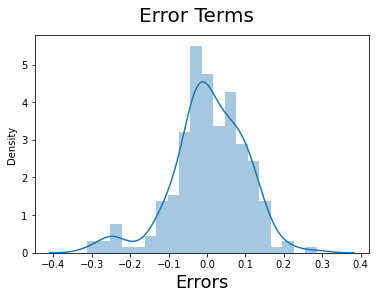

In [205]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test_rfe - y_pred_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [206]:
r2_score(y_test_rfe, y_pred_rfe)

0.8085432276361129

## Observation:
##### 
##### 1. Two different approaches are considered for model building using manual feature selection and automatic RFE  based feature selection
##### 2. There are difference between scores but these are not significantly varying
##### 3. The scores are 0.815 and 0.808 respectively
##### 4. The manual iterative selection has better score than RFE based.
##### 5. The error curve of manual selection smoothen compared to RFE based feature selection 

# ********************************* End of Assignment ***********************************